In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

d=pd.DataFrame({'date':['2019-01-03', '2021-11-22', '2023-01-05'],
'name':['J', 'Y', 'O']})
print(d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3 non-null      object
 1   name    3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes
None


In [19]:
d['date']=pd.to_datetime(d.date,format='%Y-%m-%d')
print(d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   name    3 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 176.0+ bytes
None


In [20]:
d.set_index('date',inplace=True)

In [21]:
df=pd.DataFrame({'date':['2019-01-03', '2021-11-22','2021-12-01','2023-01-05'],
'x1':[0.1,2.0,np.nan,1.2]})

In [22]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

In [23]:
df.isnull()

,x1
date,
2019-01-03,False
2021-11-22,False
2021-12-01,True
2023-01-05,False


In [24]:
df.fillna(method='pad')

,x1
date,
2019-01-03,0.1
2021-11-22,2.0
2021-12-01,2.0
2023-01-05,1.2


In [25]:
df.dropna()

,x1
date,
2019-01-03,0.1
2021-11-22,2.0
2023-01-05,1.2


In [26]:
df.interpolate(method='values')

,x1
date,
2019-01-03,0.100000
2021-11-22,2.000000
2021-12-01,1.982396
2023-01-05,1.200000


In [27]:
df.interpolate(method='time')

,x1
date,
2019-01-03,0.100000
2021-11-22,2.000000
2021-12-01,1.982396
2023-01-05,1.200000


In [28]:
#나이, 국가, 사용가능언어, 배운곳,운영체제
df = pd.read_csv('survey_results_public.csv')
df = df[['Age','Country','LanguageHaveWorkedWith','LearnCode','OpSys']]
df.head()


,Age,Country,LanguageHaveWorkedWith,LearnCode,OpSys
0,25-34 years old,Slovakia,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Coding Bootcamp;Other online resources (ex: vi...,MacOS
1,18-24 years old,Netherlands,JavaScript;Python,"Other online resources (ex: videos, blogs, etc...",Windows
2,18-24 years old,Russian Federation,Assembly;C;Python;R;Rust,"Other online resources (ex: videos, blogs, etc...",MacOS
3,35-44 years old,Austria,JavaScript;TypeScript,NaN,Windows
4,25-34 years old,United Kingdom of Great Britain and Northern I...,Bash/Shell;HTML/CSS;Python;SQL,Friend or family member,Linux-based


In [29]:
df['Age'].unique()
df['Age'].drop_duplicates()

0         25-34 years old
1         18-24 years old
3         35-44 years old
6       Prefer not to say
14        45-54 years old
15     Under 18 years old
47      65 years or older
105       55-64 years old
149                   NaN
Name: Age, dtype: object

In [30]:
agedf = df.groupby(['Age']).size()

In [31]:
dfcnt = df.groupby(['Country']).size()

<Axes: xlabel='count', ylabel='Age'>

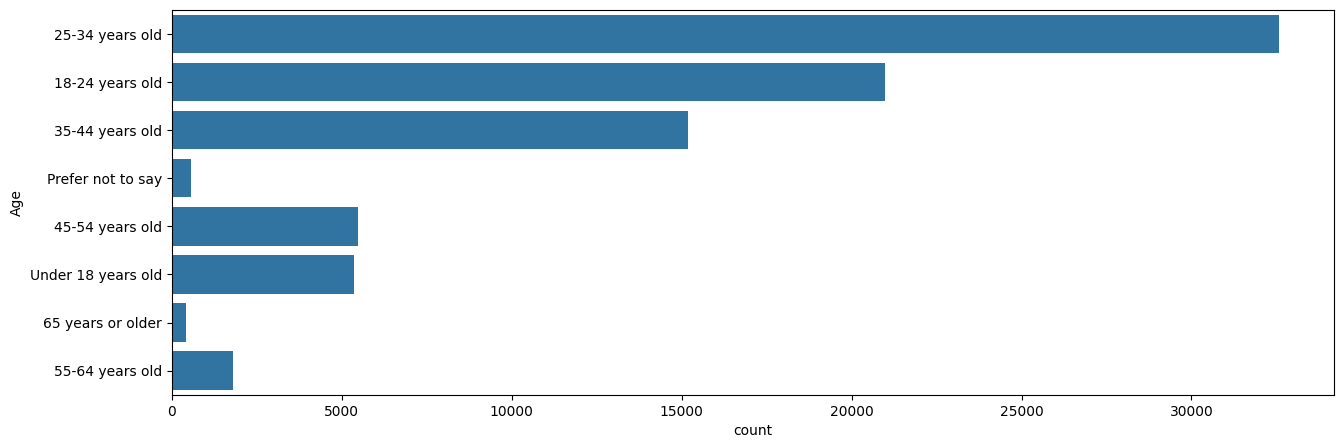

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(y='Age',data = df)

<Axes: xlabel='Age'>

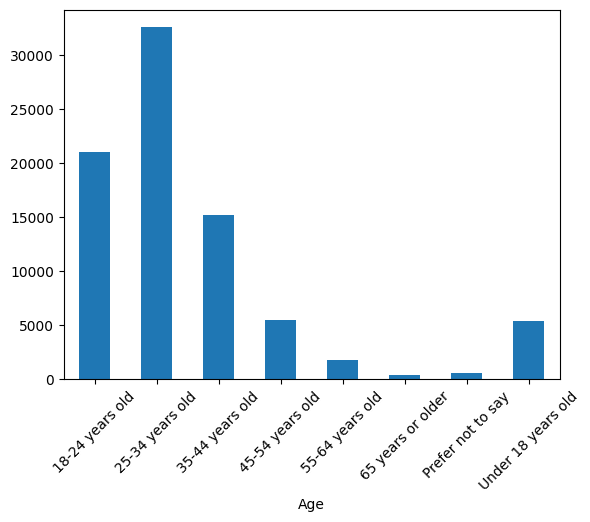

In [33]:
agedf.plot.bar(rot=45)

<Axes: xlabel='Age'>

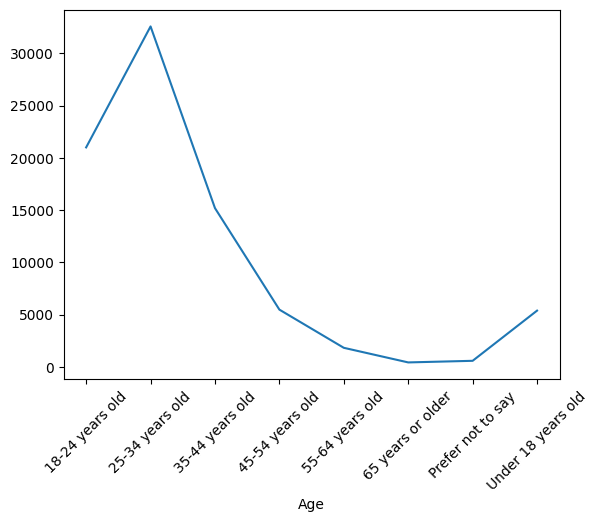

In [34]:
agedf.plot.line(rot=45)

Index(['18-24 years old', '25-34 years old', '35-44 years old',
       '45-54 years old', '55-64 years old', '65 years or older',
       'Prefer not to say', 'Under 18 years old'],
      dtype='object', name='Age')

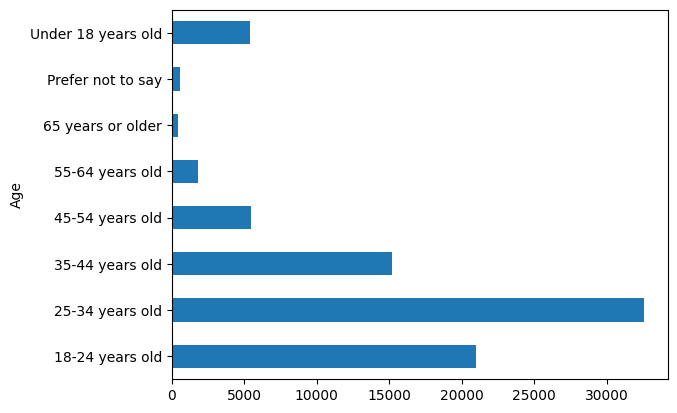

In [35]:
agedf.plot.barh()
agedf.index

In [36]:
agedf = agedf.reindex(['Under 18 years old','18-24 years old','25-34 years old','35-44 years old',
               '45-54 years old','55-64 years old','65 years or older','Prefer not to say'])

<Axes: >

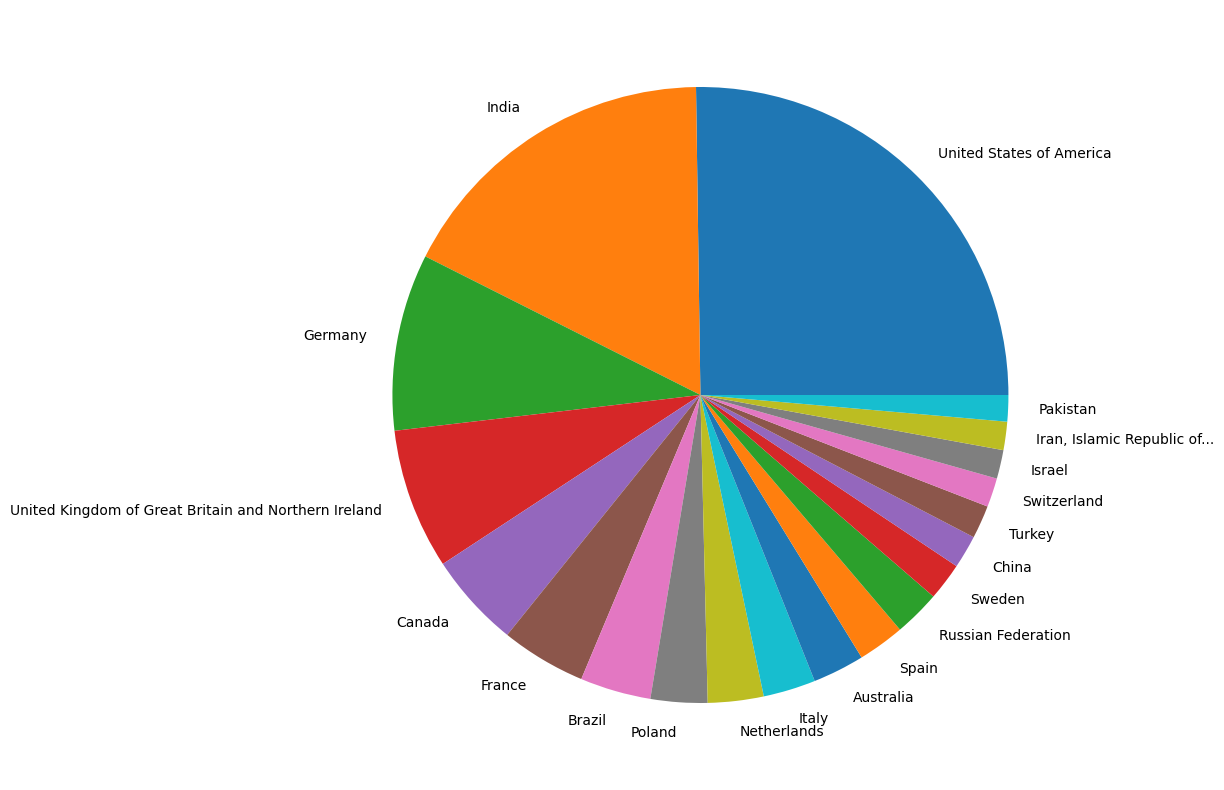

In [37]:
dfcnt = dfcnt.sort_values(ascending=False)
dfcnt[:20].plot.pie(figsize = (10,10))
#nlargest(20) 상위 몇개 확인

In [45]:
lan = df['LanguageHaveWorkedWith'].str.split(';')
lan = lan.explode().value_counts()
lan1 = df['LanguageHaveWorkedWith'][df['Age']=='25-34 years old'].str.split(';').explode().value_counts()
lan1


LanguageHaveWorkedWith
JavaScript     21403
HTML/CSS       17520
SQL            15468
Python         14140
TypeScript     11253
Node.js        11211
Java           10544
Bash/Shell      8512
C#              8370
PHP             6978
C++             5843
C               4741
PowerShell      3295
Go              3268
Kotlin          2840
Ruby            2434
Rust            2090
Swift           1767
Dart            1766
R               1584
VBA             1313
Matlab          1248
Groovy          1084
Objective-C     1024
Assembly         986
Scala            966
Elixir           623
Clojure          616
Perl             536
Haskell          509
Julia            393
Delphi           339
LISP             300
F#               280
Erlang           240
Crystal          123
APL              115
COBOL            101
Name: count, dtype: int64

<Axes: ylabel='count'>

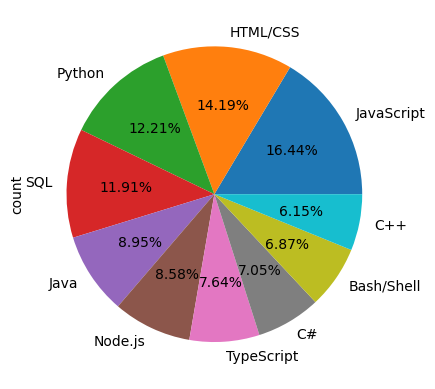

In [39]:
lan[:10].plot.pie(autopct = '%.2f%%')

<Axes: ylabel='count'>

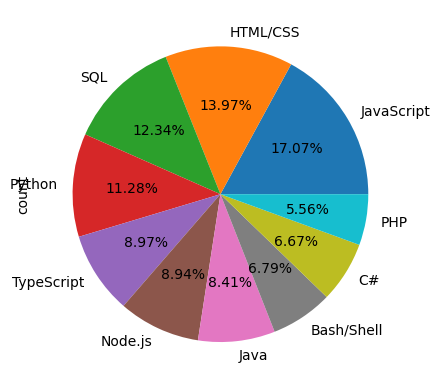

In [46]:
lan1[:10].plot.pie(autopct = '%.2f%%')